In [1]:
import pandas as pd
import numpy as np

Wczytujemy dane do pythona

In [2]:
bez_rej = pd.read_excel(io = "local_bez_rej.xlsx", sheet_name = 1)
bez_rej.head()

,Kod,Nazwa,Ogółem,Rok,Wartosc,Jednostka miary,Atrybut
0,201000,Powiat bolesławiecki,ogółem,2018,3.8,%,
1,202000,Powiat dzierżoniowski,ogółem,2018,6.1,%,
2,203000,Powiat głogowski,ogółem,2018,8.9,%,
3,204000,Powiat górowski,ogółem,2018,15.3,%,
4,205000,Powiat jaworski,ogółem,2018,12.4,%,


In [3]:
ryn_nier = pd.read_excel(io = "local_rynek_nieruchomosci.xlsx", sheet_name = 1)
wynag = pd.read_excel(io = "local_wynagrodzenia.xlsx", sheet_name = 1)

Jakie zmiany musimy wprowadzić naszego zbioru danych

1. Nasz kod jednostki to TERYT ale python potraktował go jak zmienną numeryczną. Musimy zmienić jej typ na typ string i dołożyć zero z przodu.
2. Nie potrzebujemy wszystkich kolumn.
3. Nazwy kolumn są źle przygotowane i nalezy je zmienić.
4. Dane chcemy połączyć w jedna bazę danych.
5. Celem jest zbadanie zależności miedzy poszczególnymi zmienny.

In [11]:
## zmieniamy typ zmiennej z numeric na string
bez_rej["Kod"] = bez_rej["Kod"].astype(str) ## apply(str)
### używamy funkcji str.pad do dodania zer z przodu
bez_rej["Kod"] = bez_rej.Kod.str.pad(width=7, side = 'left', fillchar='0')
bez_rej.head()

,Kod,Nazwa,Ogółem,Rok,Wartosc,Jednostka miary,Atrybut
0,0201000,Powiat bolesławiecki,ogółem,2018,3.8,%,
1,0202000,Powiat dzierżoniowski,ogółem,2018,6.1,%,
2,0203000,Powiat głogowski,ogółem,2018,8.9,%,
3,0204000,Powiat górowski,ogółem,2018,15.3,%,
4,0205000,Powiat jaworski,ogółem,2018,12.4,%,


Spróbujmy zrobić zmianę typu i dodanie zer w jednym kroku

In [20]:
ryn_nier["Kod"] = ryn_nier.Kod.astype(str).str.pad(width = 7, side = 'left', fillchar = '0')
wynag["Kod"] = wynag["Kod"].astype(str).str.pad(width = 7, side = 'left', fillchar = '0')
wynag.head()

,Kod,Nazwa,Wyszczególnienie,Rok,Wartosc,Jednostka miary,Atrybut
0,0201000,Powiat bolesławiecki,ogółem,2018,4214.66,zł,
1,0202000,Powiat dzierżoniowski,ogółem,2018,4024.94,zł,
2,0203000,Powiat głogowski,ogółem,2018,4077.69,zł,
3,0204000,Powiat górowski,ogółem,2018,3815.89,zł,
4,0205000,Powiat jaworski,ogółem,2018,4029.64,zł,


Tworzymy podzbiory na potrzeby dalszych analiz

```
A["zmienna"]
```

```
A[["zmienna"]]
```

```
A[ ["zmienna1", "zmienna2", ...] ]
```

In [25]:
pow_bez_rej = bez_rej[ ["Kod", "Nazwa", "Wartosc"] ]
pow_ryn_nier = ryn_nier[["Kod", "Transakcje rynkowe", "Wartosc"]]
pow_wynag = wynag[["Kod", "Wartosc"]]

Jak powinny nazywać się kolumny?


*  unikać polskich słów -- "Wartość" => "wartosc"
*  nie powinno być spacji -- "Rynek nieruchomosci" => "rynek_nieruchomosci", "rynekNieruchomosci"
* nie powinno być znaków specjalnych -- "Rynek w $" => "rynek_dolar"
* zmienne z latami -- "StopaBezr2018", "stopa_bezr_2019" => "stopa_bezr_2018", "stopa_bezr_2019"




In [32]:
## zmieniamy nazwy kolumn
pow_bez_rej.rename(columns = {"Kod":"kod", "Nazwa":"nazwa", "Wartosc": "stopa_bezr"}, inplace=True)
pow_ryn_nier.rename(columns = {"Kod":"kod", "Transakcje rynkowe": "rynek", "Wartosc":"mediana"}, inplace=True)
pow_wynag.rename(columns = {"Kod":"kod", "Wartosc":"wynagrodzenie"}, inplace=True)
pow_wynag.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,kod,wynagrodzenie
0,0201000,4214.66
1,0202000,4024.94
2,0203000,4077.69
3,0204000,3815.89
4,0205000,4029.64


Łączymy dane z dwóch baz danych (`pow_bez_rej` i `pow_wynag`)

In [35]:
dane_analiza = pd.merge(left = pow_bez_rej, right = pow_wynag, on = "kod")
dane_analiza.head()

,kod,nazwa,stopa_bezr,wynagrodzenie
0,0201000,Powiat bolesławiecki,3.8,4214.66
1,0202000,Powiat dzierżoniowski,6.1,4024.94
2,0203000,Powiat głogowski,8.9,4077.69
3,0204000,Powiat górowski,15.3,3815.89
4,0205000,Powiat jaworski,12.4,4029.64


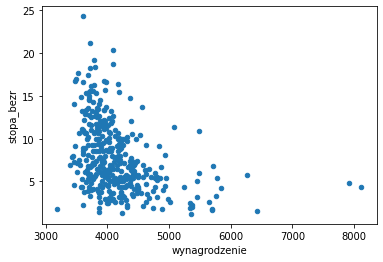

In [36]:
dane_analiza.plot.scatter(x = "wynagrodzenie", y = "stopa_bezr")